In [0]:
!pip install scikit-plot

# **IMPORTING PACKAGES**

In [0]:
import numpy as np
import pandas as pd

from wordcloud import WordCloud,STOPWORDS


from sklearn.model_selection import train_test_split 

from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer

from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.metrics import roc_curve,auc

import nltk
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer

import re

In [0]:
import matplotlib.pyplot as plt 
import seaborn as sns
import scikitplot as skplt

In [0]:
#import methods
from sklearn.naive_bayes import MultinomialNB 
from sklearn import svm
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier

In [0]:
nltk.download("stopwords")
nltk.download('punkt')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

# Read Data 

In [0]:
df=pd.read_csv('emails.csv')
df.head()

,text,spam
0,Subject: naturally irresistible your corporate...,1
1,Subject: the stock trading gunslinger fanny i...,1
2,Subject: unbelievable new homes made easy im ...,1
3,Subject: 4 color printing special request add...,1
4,"Subject: do not have money , get software cds ...",1


# Show Data

In [0]:
print(df.head(11))
print(df.shape)

                                                 text  spam
0   Subject: naturally irresistible your corporate...     1
1   Subject: the stock trading gunslinger  fanny i...     1
2   Subject: unbelievable new homes made easy  im ...     1
3   Subject: 4 color printing special  request add...     1
4   Subject: do not have money , get software cds ...     1
5   Subject: great nnews  hello , welcome to medzo...     1
6   Subject: here ' s a hot play in motion  homela...     1
7   Subject: save your money buy getting this thin...     1
8   Subject: undeliverable : home based business f...     1
9   Subject: save your money buy getting this thin...     1
10  Subject: las vegas high rise boom  las vegas i...     1
(5728, 2)


In [0]:
df.drop_duplicates(inplace=True)
print(df.shape)

(5695, 2)


In [0]:
df.columns = ['Text', 'Label']
df.head()

,Text,Label
0,Subject: naturally irresistible your corporate...,1
1,Subject: the stock trading gunslinger fanny i...,1
2,Subject: unbelievable new homes made easy im ...,1
3,Subject: 4 color printing special request add...,1
4,"Subject: do not have money , get software cds ...",1


# Splitting the labels and the data separately

In [0]:
df_labels = df['Label']
df_labels.head(11)

0     1
1     1
2     1
3     1
4     1
5     1
6     1
7     1
8     1
9     1
10    1
Name: Label, dtype: int64

In [0]:
import nltk
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
df['Text']=df['Text'].map(lambda Text: Text[6:])
df['Text'] = df['Text'].map(lambda text:re.sub('[^A-Za-z]+', ' ',text)).apply(lambda x: (x.lower()).split())
ps = PorterStemmer()
df['Text']=df['Text'].apply(lambda text_list: ' '.join(list(map(lambda word : ps.stem(word),(list(filter(lambda text:text not in set(stopwords.words('english')),text_list)))))))


In [0]:
df.head()

,Text,Label
0,natur irresist corpor ident lt realli hard rec...,1
1,stock trade gunsling fanni merril muzo colza a...,1
2,unbeliev new home made easi im want show homeo...,1
3,color print special request addit inform click...,1
4,money get softwar cd softwar compat great grow...,1


# Data Visualization
 - To check the most used word in Ham Email and Spam Email
 - To visualize the percentage of Ham and Spam Email



				 HAM WORDS


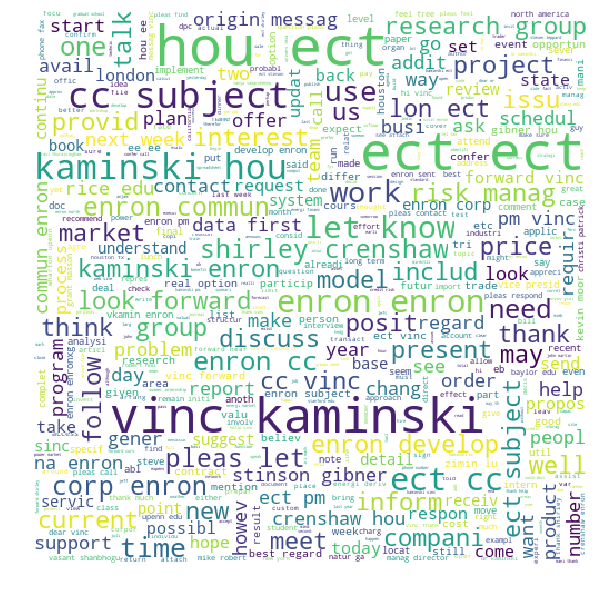

				 SPAM WORDS


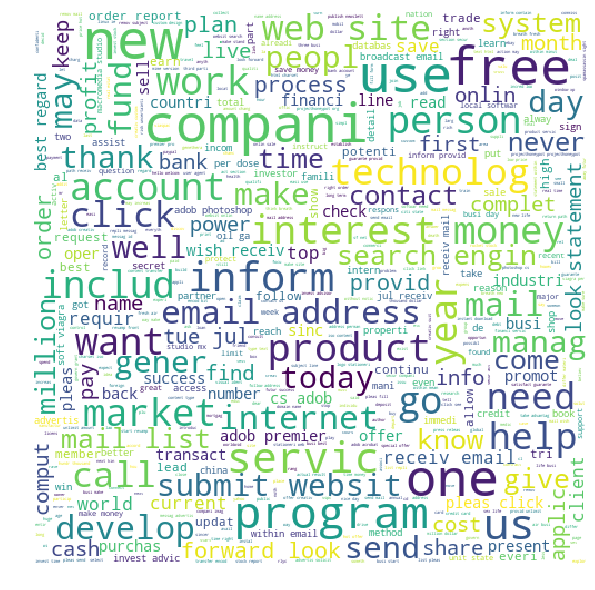

In [0]:
stopwords = STOPWORDS
stopwords = list(stopwords)
STOPWORDS = nltk.corpus.stopwords.words('english')
stopwords = stopwords + STOPWORDS

ham_dataset = df[df.Label == 0]
spam_dataset = df[df.Label == 1]
ham_words = ' '
spam_words = ' '

for words in ham_dataset.Text:
    txt = words.lower()
    tokens = nltk.word_tokenize(txt)
    for word in tokens:
        ham_words = ham_words + word + " "
for words in spam_dataset.Text:
    txt = words.lower()
    tokens = nltk.word_tokenize(txt)
    for word in tokens:
        spam_words = spam_words + word + " "

def gen_wordcloud(wordcloud):
    plt.figure(figsize = (10,8))
    plt.imshow(wordcloud)
    plt.tight_layout(pad=0)
    plt.axis('off')
    plt.show()
    
print("\n")    
print("\t\t\t\t HAM WORDS")    
wordcloud = WordCloud(background_color = 'white', width = 500, height = 500, stopwords = stopwords,
                     max_words = 500, max_font_size = 50, random_state = 42).generate(ham_words)
gen_wordcloud(wordcloud)

print("\t\t\t\t SPAM WORDS")
wordcloud = WordCloud(background_color = 'white', width = 500, height = 500, stopwords = stopwords,
                     max_words = 500, max_font_size = 50, random_state = 42).generate(spam_words)
gen_wordcloud(wordcloud)

## Plotting ham and spam data % in pie chart

0    4327
1    1368
Name: Label, dtype: int64


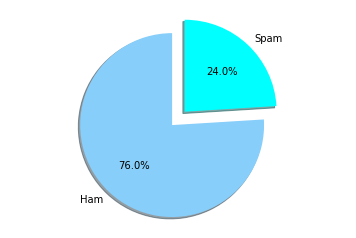

In [0]:
count_Class = pd.value_counts(df.Label, sort = True)
print(count_Class)
# Data to Plot
labels = 'Ham', 'Spam'
sizes = [count_Class[0], count_Class[1]]
colors = ['lightskyblue', 'aqua']
explode = (0.1, 0.1)

# Plot
plt.pie(sizes, explode = explode, labels = labels, colors = colors,
        autopct = '%1.1f%%', shadow = True, startangle = 90)
plt.axis('equal')
plt.show()

# Splitting the Test and Train Data 

In [0]:
train_set, test_set, train_label, test_label = train_test_split(df, df_labels, test_size = 0.33, random_state = 42)
print(train_set.shape)
print(test_set.shape)
print("\nThe Trainset consists of {} records and {} features".format(train_set.shape[0],train_set.shape[1]))
print("\nThe Testset consists of {} records and {} features".format(test_set.shape[0],train_set.shape[1]))

(3815, 2)
(1880, 2)

The Trainset consists of 3815 records and 2 features

The Testset consists of 1880 records and 2 features


# Extracting N-grams from the Text Data

In [0]:
countvect = CountVectorizer(ngram_range = (2,2), )
x_counts = countvect.fit(train_set.Text)

# preparing for training set
x_train_df = countvect.transform(train_set.Text)

# preparing for test set
x_test_df = countvect.transform(test_set.Text)

# Data Model

The Algorithms used below in this notebooks are:

 - Naive Bayes
 - K-Nearest
 - Decision Tree
 - Support Vector Machine
 - Random Forest
 -MLP Classifier

# Naive Bayes classifier 

Accuracy of Naive Bayes classifier is 98.35106382978724%

 [[1386    4]
 [  27  463]]


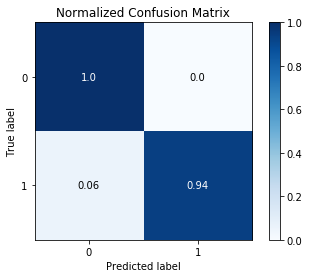

In [0]:
clf = MultinomialNB()
clf.fit(x_train_df,train_set.Label)
predicted_values_NB = clf.predict(x_test_df)
predictions = dict()
accuracy = accuracy_score(test_set.Label, predicted_values_NB)
predictions['Naive Bayes'] = accuracy * 100
confusionmatrix = confusion_matrix(test_set.Label, predicted_values_NB)
print("Accuracy of Naive Bayes classifier is {}%".format(accuracy * 100))
print("\n", confusionmatrix)
skplt.metrics.plot_confusion_matrix(test_set.Label, predicted_values_NB, normalize = True)
plt.show()

# K-Nearest Neighbors algorithm


[0 0 0 ... 0 0 0]

The accuracy of K-Nearest Neighbors algorithm is 81.75531914893617%

 [[1390    0]
 [ 343  147]]


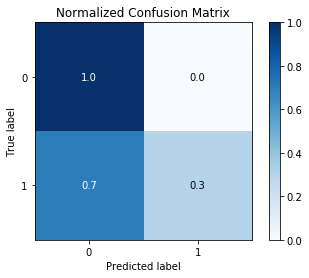

In [0]:
KNN = KNeighborsClassifier()
KNN.fit(x_train_df, train_set.Label)
predicted_values_KNN = KNN.predict(x_test_df)
print(predicted_values_KNN)
accuracy_KNN = accuracy_score(test_set.Label, predicted_values_KNN)
predictions['K-Nearest Neighbors algorithm'] = accuracy_KNN * 100
print("\nThe accuracy of K-Nearest Neighbors algorithm is {}%".format(accuracy_KNN * 100))
confusion_matrix_KNN = confusion_matrix(test_set.Label, predicted_values_KNN)
print("\n", confusion_matrix_KNN)
skplt.metrics.plot_confusion_matrix(test_set.Label, predicted_values_KNN, normalize = True)
plt.show()

# Decision Tree learning

[0 0 0 ... 0 0 0]

The accuracy of Decision Tree learning is 92.34042553191489%

 [[1362   28]
 [ 116  374]]


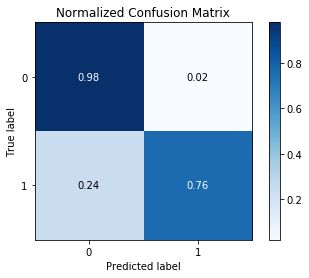

In [0]:
DT = DecisionTreeClassifier()
DT.fit(x_train_df, train_set.Label)
predicted_values_DT = DT.predict(x_test_df)
print(predicted_values_DT)
accuracy_DT = accuracy_score(test_set.Label, predicted_values_DT)
predictions['Decision Tree learning'] = accuracy_DT * 100
print("\nThe accuracy of Decision Tree learning is {}%".format(accuracy_DT * 100))
confusion_matrix_DT = confusion_matrix(test_set.Label, predicted_values_DT)
print("\n", confusion_matrix_DT)
skplt.metrics.plot_confusion_matrix(test_set.Label, predicted_values_DT, normalize = True)
plt.show()

# Support Vector Machine (SVM)

/usr/local/lib/python3.6/dist-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


[0 0 0 ... 0 0 0]

The accuracy of Support Vector Machine (SVM) is 73.93617021276596%

 [[1390    0]
 [ 490    0]]


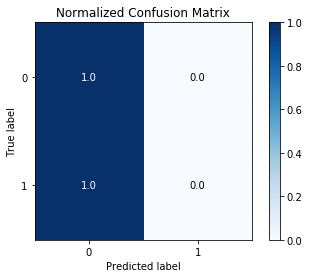

In [0]:
SVM = svm.SVC()
SVM.fit(x_train_df, train_set.Label)
predicted_values_SVM = SVM.predict(x_test_df)
print(predicted_values_SVM)
accuracy_SVM = accuracy_score(test_set.Label, predicted_values_SVM)
predictions['Support Vector Machine (SVM)'] = accuracy_SVM * 100
print("\nThe accuracy of Support Vector Machine (SVM) is {}%".format(accuracy_SVM * 100))
confusion_matrix_SVM = confusion_matrix(test_set.Label, predicted_values_SVM)
print("\n", confusion_matrix_SVM)
skplt.metrics.plot_confusion_matrix(test_set.Label, predicted_values_SVM, normalize = True)
plt.show()

# Random Forest

[0 0 0 ... 0 0 0]

The accuracy of Random Forest is 90.05319148936171%

 [[1387    3]
 [ 184  306]]


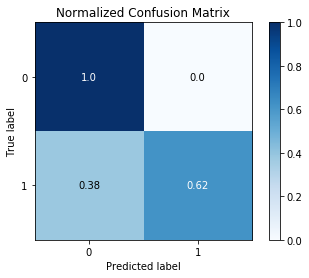

In [0]:
RF = RandomForestClassifier(n_estimators = 100, oob_score = True, random_state = 123456)

RF.fit(x_train_df, train_set.Label)
predicted_values_RF = RF.predict(x_test_df)
print(predicted_values_RF)
accuracy_RF = accuracy_score(test_set.Label, predicted_values_RF)
predictions['Random Forest'] = accuracy_RF * 100
print("\nThe accuracy of Random Forest is {}%".format(accuracy_RF * 100))
confusion_matrix_RF = confusion_matrix(test_set.Label, predicted_values_RF)
print("\n", confusion_matrix_RF)
skplt.metrics.plot_confusion_matrix(test_set.Label, predicted_values_RF, normalize = True)
plt.show()

# **MLP Classifier**

In [0]:
clf = MLPClassifier(hidden_layer_sizes = (6,2), activation = 'relu',learning_rate = 'adaptive', max_iter = 100)
clf

MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(6, 2), learning_rate='adaptive',
              learning_rate_init=0.001, max_iter=100, momentum=0.9,
              n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
              random_state=None, shuffle=True, solver='adam', tol=0.0001,
              validation_fraction=0.1, verbose=False, warm_start=False)

In [0]:
clf.fit(x_train_df,train_set.Label)
pred=clf.predict(x_test_df)

/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)



The accuracy of MLPclassifier is 90.05319148936171%

 [[1390    0]
 [  92  398]]


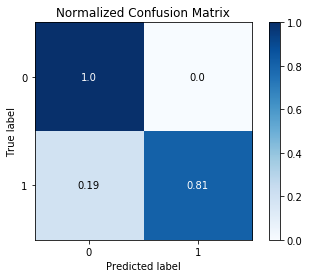

In [0]:
predictions['MLPclassifier'] = accuracy_RF * 100
print("\nThe accuracy of MLPclassifier is {}%".format(accuracy_RF * 100))
confusion_matrix_RF = confusion_matrix(test_set.Label, pred)
print("\n", confusion_matrix_RF)
skplt.metrics.plot_confusion_matrix(test_set.Label, pred, normalize = True)
plt.show()

# Method Comparison

,Algorithms,Percentage
0,Naive Bayes,98.351064
1,K-Nearest Neighbors algorithm,81.755319
2,Decision Tree learning,92.340426
3,Support Vector Machine (SVM),73.936170
4,Random Forest,90.053191
5,MLPclassifier,90.053191


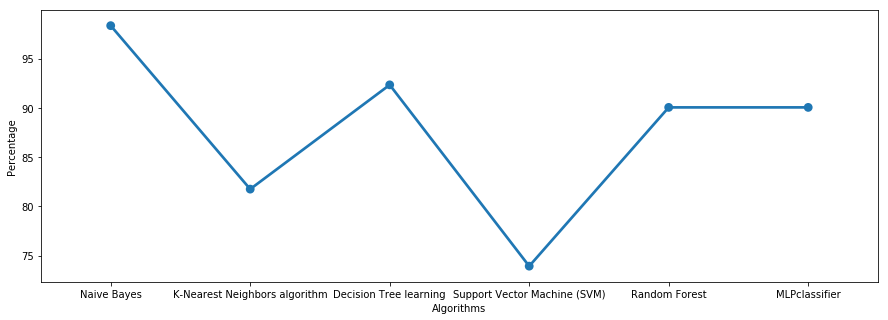

In [0]:
fig, (ax1) = plt.subplots(ncols = 1, sharey = True,figsize = (15,5))
df1 = pd.DataFrame(list(predictions.items()),columns = ['Algorithms','Percentage'])
display(df1)
sns.pointplot(x = "Algorithms", y = "Percentage", data = df1,ax = ax1);

# ROC Accuracy

In [0]:
test_prediction = test_set.Label.tolist()
predicted_values = predicted_values_NB.tolist()
test_prediction = [1 if pred==1 else 0 for pred in test_prediction]
predicted_values = [1 if pred==1 else 0 for pred in predicted_values]
fpr, tpr, thresholds = roc_curve(test_prediction,predicted_values)
roc_auc = auc(fpr, tpr)

print("The ROC Accuracy is {}".format(roc_auc))

The ROC Accuracy is 0.9710101306709734


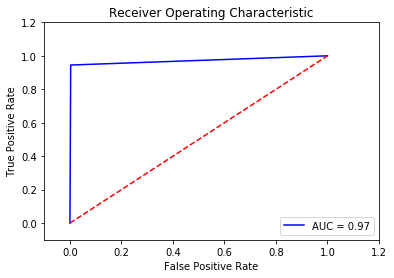

In [0]:
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b',
label='AUC = %0.2f'% roc_auc)
plt.legend(loc='lower right')
plt.plot([0,1],[0,1],'r--')
plt.xlim([-0.1,1.2])
plt.ylim([-0.1,1.2])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()